# PMOD TC1 Sensor demonstration

This demonstration shows how to use the PmodTC1. You will also see how to plot a graph using matplotlib.

The PmodTC1 is required.

The thermocouple sensor is initialized and set to log a reading every 1 second.  The temperature of the sensor
can be changed by touching it with warm fingers or by blowing on it.

### 1. Use TC1 read() to read the current temperature

In [16]:
from pynq import Overlay
Overlay("base.bit").download()

In [17]:
from pynq.iop import Pmod_TC1
from pynq.iop import PMODB

# TC1 sensor is on PMODB
my_tc1 = Pmod_TC1(PMODB)
r = my_tc1.read()
print('Raw Register Value: %08x hex' % r)
print('Ref Junction Temp:  %.4f' % my_tc1.reg_to_ref(r))
print('Thermocouple Temp:  %.2f' % my_tc1.reg_to_tc(r))
print('Alarm flags:        %08x hex' % my_tc1.reg_to_alarms(r))

Raw Register Value: 01841a40 hex
Ref Junction Temp:  26.2500
Thermocouple Temp:  24.25
Alarm flags:        00000000 hex


### 2. Starting logging temperature once every second

In [18]:
my_tc1.start_log()

### 3. Modifying the temperture

* Touch the thermocouple with warm fingers; or
* Blow on the thermocouple with cool air

Stop the logging whenever you are finished trying to change the sensor's value.

In [19]:
my_tc1.stop_log()
log = my_tc1.get_log()

### 4. Plot values over time

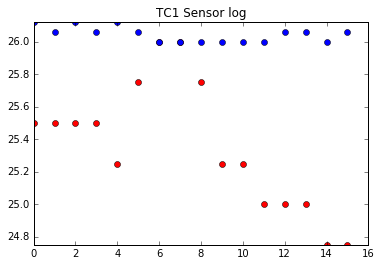

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
tc = [my_tc1.reg_to_tc(v) for v in log]
ref = [my_tc1.reg_to_ref(v) for v in log]
plt.plot(range(len(tc)), tc, 'ro')
plt.plot(range(len(ref)), ref, 'bo')
plt.title('TC1 Sensor log')
plt.axis([0, len(log), min(tc+ref), max(tc+ref)])
plt.show()